Nodes of graph: 
['DiskSpace(t)', 'Npod(t)', 'Delete Besteffort pod', 'Mem(t)', 'CPU(t)', 'Horizontal Scale', 'Vertical Scale', 'Resource Limit', 'Priority Define']
Edges of graph: 
[('DiskSpace(t)', 'Npod(t)'), ('DiskSpace(t)', 'Delete Besteffort pod'), ('Npod(t)', 'Mem(t)'), ('Npod(t)', 'CPU(t)'), ('Npod(t)', 'Vertical Scale'), ('Mem(t)', 'Horizontal Scale'), ('CPU(t)', 'Horizontal Scale'), ('Vertical Scale', 'Resource Limit'), ('Vertical Scale', 'Priority Define')]


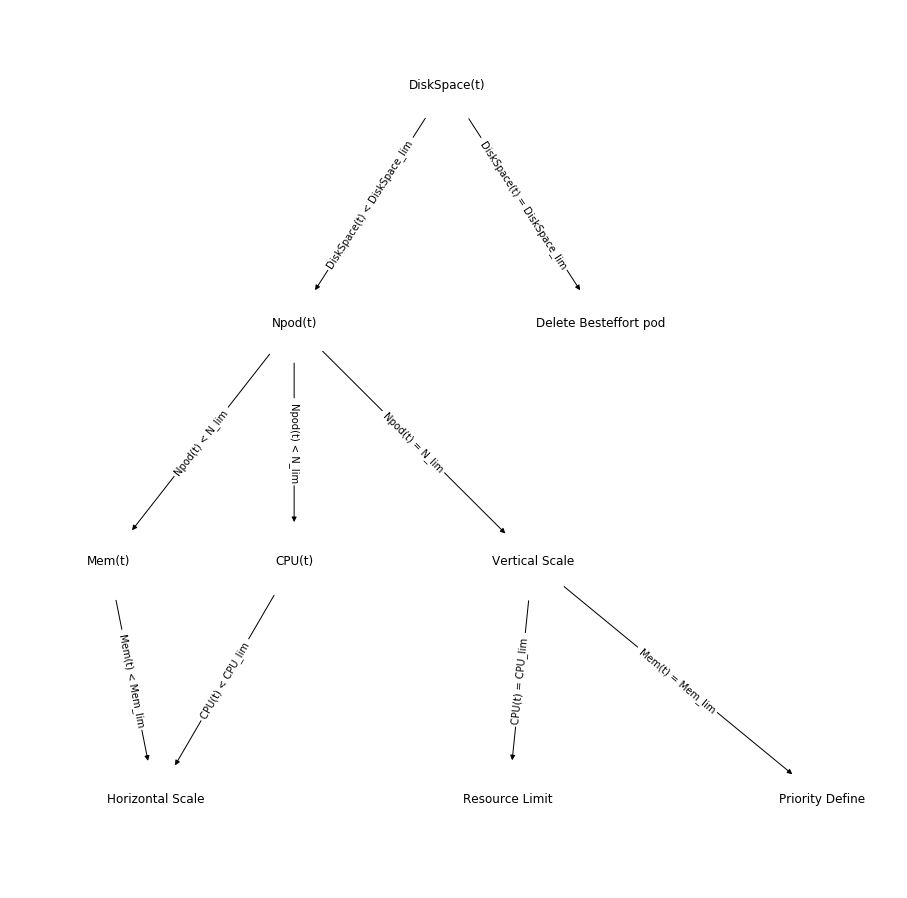

In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from matplotlib import pyplot as plt
G=nx.DiGraph()
G.add_node("DiskSpace(t)")
G.add_node("Npod(t)")
G.add_weighted_edges_from([("DiskSpace(t)","Npod(t)","DiskSpace(t) < DiskSpace_lim")])
G.add_node("Delete Besteffort pod")
G.add_weighted_edges_from([("DiskSpace(t)","Delete Besteffort pod","DiskSpace(t) = DiskSpace_lim")])
G.add_nodes_from(["Mem(t)","CPU(t)"])
edge = ("Npod(t)", "Mem(t)")
G.add_edge(*edge)
edge = ("Npod(t)", "CPU(t)")
G.add_edge(*edge)
G.add_weighted_edges_from([("Npod(t)", "Mem(t)", "Npod(t) < N_lim"), ("Npod(t)", "CPU(t)", "Npod(t) < N_lim")])

G.add_node("Horizontal Scale")

G.add_weighted_edges_from([("Mem(t)", "Horizontal Scale", "Mem(t) < Mem_lim"), ("CPU(t)", "Horizontal Scale", "CPU(t) < CPU_lim")])

G.add_node("Vertical Scale")
G.add_weighted_edges_from([("Npod(t)","Vertical Scale","Npod(t) = N_lim")])
G.add_node("Resource Limit")
G.add_weighted_edges_from([("Vertical Scale","Resource Limit", "CPU(t) = CPU_lim")])
G.add_node("Priority Define")
G.add_weighted_edges_from([("Vertical Scale","Priority Define", "Mem(t) = Mem_lim")])

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

#G.add_edges_from([("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])
#G.add_weighted_edges_from([(1, 2, "N>0.125"), (1, 3, "N<0.75"), (2, 4, "M>1.2"), (3, 4, "M<0.375")])

write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.figure(figsize=(12,12)) 
pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True, node_size=6000, node_color='w')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig("optimization_path.pdf",layout='tight') # save as png
plt.show() # display

Nodes of graph: 
['Horizontal Scale', 'Guranteed', 'Burstable', 'Besteffort', 'Request_type', 'Resource calculation for new pod deployment', 'Deploy Pod', 'Resource Limit', 'Priority Define']
Edges of graph: 
[('Horizontal Scale', 'Burstable'), ('Horizontal Scale', 'Request_type'), ('Guranteed', 'Resource calculation for new pod deployment'), ('Burstable', 'Resource calculation for new pod deployment'), ('Besteffort', 'Resource calculation for new pod deployment'), ('Request_type', 'Besteffort'), ('Request_type', 'Guranteed'), ('Resource calculation for new pod deployment', 'Deploy Pod'), ('Resource calculation for new pod deployment', 'Resource Limit'), ('Resource calculation for new pod deployment', 'Priority Define')]


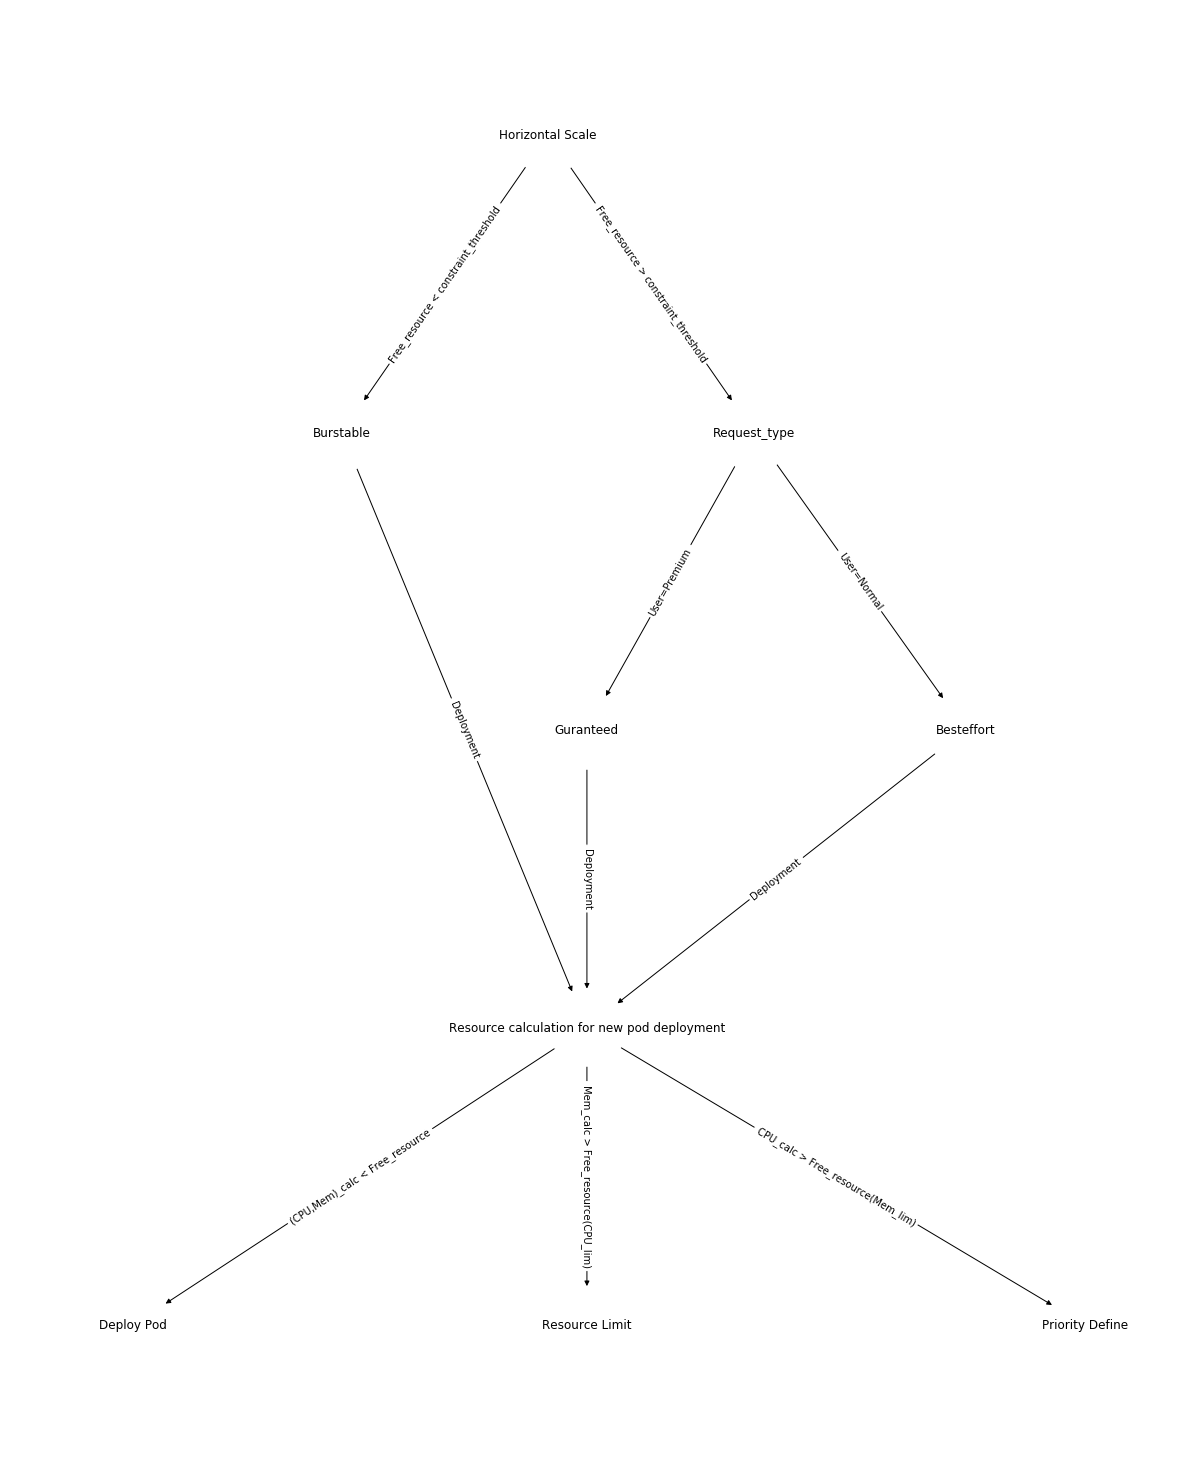

In [12]:
G=nx.DiGraph()
G.add_node("Horizontal Scale")
G.add_node("Guranteed")
G.add_node("Burstable")
G.add_node("Besteffort")
G.add_weighted_edges_from([("Horizontal Scale","Burstable","Free_resource < constraint_threshold")])
G.add_weighted_edges_from([("Horizontal Scale","Request_type","Free_resource > constraint_threshold")])
G.add_weighted_edges_from([("Request_type","Besteffort","User=Normal")])
G.add_weighted_edges_from([("Request_type","Guranteed","User=Premium")])
G.add_weighted_edges_from([("Guranteed","Resource calculation for new pod deployment","Deployment")])
G.add_weighted_edges_from([("Besteffort","Resource calculation for new pod deployment","Deployment")])
G.add_weighted_edges_from([("Burstable","Resource calculation for new pod deployment","Deployment")])

G.add_weighted_edges_from([("Resource calculation for new pod deployment","Deploy Pod","(CPU,Mem)_calc < Free_resource")])
G.add_weighted_edges_from([("Resource calculation for new pod deployment","Resource Limit","Mem_calc > Free_resource(CPU_lim)")])
G.add_weighted_edges_from([("Resource calculation for new pod deployment","Priority Define","CPU_calc > Free_resource(Mem_lim)")])

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

#G.add_edges_from([("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])
#G.add_weighted_edges_from([(1, 2, "N>0.125"), (1, 3, "N<0.75"), (2, 4, "M>1.2"), (3, 4, "M<0.375")])

write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.figure(figsize=(16,20)) 
pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True, node_size=6000, node_color='w')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig("optimization_path_horizontalscale.pdf",layout='tight') # save as png
plt.show() # display

Nodes of graph: 
['Vertical Scale', 'Request_type', 'Burstable', 'Besteffort', 'Guranteed', 'Resource calculation', 'Resource Limit', 'Priority Define', 'Pod Selection and scale']
Edges of graph: 
[('Vertical Scale', 'Request_type'), ('Vertical Scale', 'Burstable'), ('Request_type', 'Besteffort'), ('Request_type', 'Guranteed'), ('Burstable', 'Resource calculation'), ('Besteffort', 'Resource calculation'), ('Guranteed', 'Resource calculation'), ('Resource calculation', 'Resource Limit'), ('Resource calculation', 'Priority Define'), ('Resource calculation', 'Pod Selection and scale')]


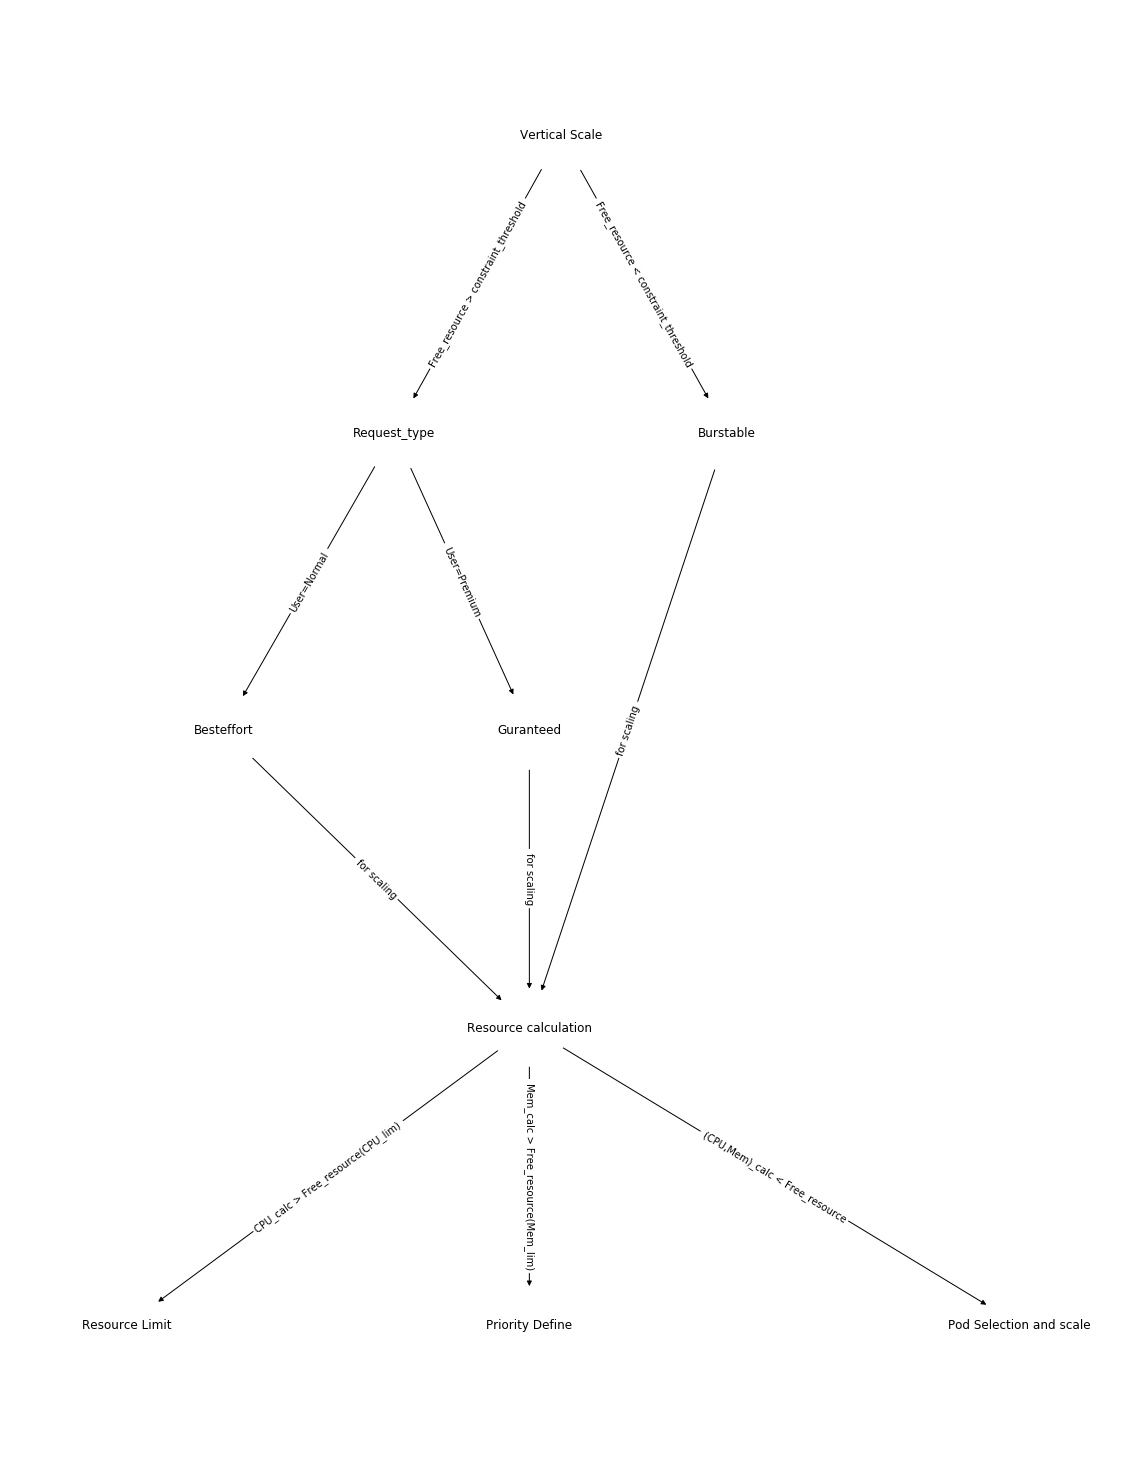

In [17]:
G=nx.DiGraph()
G.add_node("Vertical Scale")
G.add_weighted_edges_from([("Vertical Scale","Request_type","CPU(t)<CPU_lim,Mem(t)<Mem_lim")])
G.add_weighted_edges_from([("Vertical Scale","Burstable","Free_resource < constraint_threshold")])
G.add_weighted_edges_from([("Vertical Scale","Request_type","Free_resource > constraint_threshold")])
G.add_weighted_edges_from([("Request_type","Besteffort","User=Normal")])
G.add_weighted_edges_from([("Request_type","Guranteed","User=Premium")])
G.add_weighted_edges_from([("Guranteed","Resource calculation","for scaling")])
G.add_weighted_edges_from([("Besteffort","Resource calculation","for scaling")])
G.add_weighted_edges_from([("Burstable","Resource calculation","for scaling")])
G.add_weighted_edges_from([("Resource calculation","Resource Limit","CPU_calc > Free_resource(CPU_lim)")])
G.add_weighted_edges_from([("Resource calculation","Priority Define","Mem_calc > Free_resource(Mem_lim)")])
G.add_weighted_edges_from([("Resource calculation","Pod Selection and scale","(CPU,Mem)_calc < Free_resource")])

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

#G.add_edges_from([("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])
#G.add_weighted_edges_from([(1, 2, "N>0.125"), (1, 3, "N<0.75"), (2, 4, "M>1.2"), (3, 4, "M<0.375")])

write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.figure(figsize=(15,20)) 
pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True, node_size=6000, node_color='w')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig("optimization_path_verticalscale.pdf",layout='tight') # save as png
plt.show() # display

Nodes of graph: 
['Pod Selection and scale', 'Local search in round robin until timeout(population ranked by pod deployment timestamp)', 'Scale', 'Resource Limit']
Edges of graph: 
[('Pod Selection and scale', 'Local search in round robin until timeout(population ranked by pod deployment timestamp)'), ('Local search in round robin until timeout(population ranked by pod deployment timestamp)', 'Scale'), ('Local search in round robin until timeout(population ranked by pod deployment timestamp)', 'Resource Limit')]


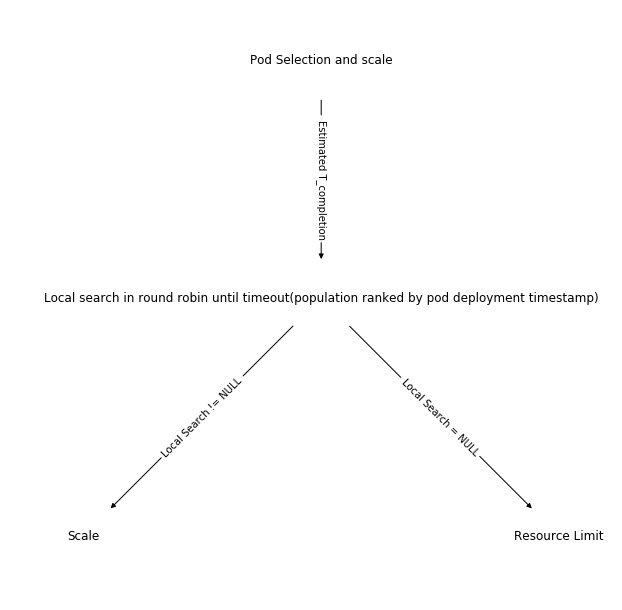

In [19]:
G=nx.DiGraph()
G.add_node("Pod Selection and scale")
G.add_weighted_edges_from([("Pod Selection and scale", "Local search in round robin until timeout(population ranked by pod deployment timestamp)", "Estimated T_completion")])
G.add_weighted_edges_from([("Local search in round robin until timeout(population ranked by pod deployment timestamp)", "Scale","Local Search != NULL")])
G.add_weighted_edges_from([("Local search in round robin until timeout(population ranked by pod deployment timestamp)", "Resource Limit","Local Search = NULL")])


print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

#G.add_edges_from([("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])
#G.add_weighted_edges_from([(1, 2, "N>0.125"), (1, 3, "N<0.75"), (2, 4, "M>1.2"), (3, 4, "M<0.375")])

write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.figure(figsize=(8,8)) 
pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True, node_size=6000, node_color='w')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig("optimization_path_podselection_scale.pdf",layout='tight') # save as png
plt.show() # display

Nodes of graph: 
['Priority Define', 'Burstable dedicate to premium', 'Besteffort dedicate to premium', 'Burstable-Allow routing for normal user', 'Premium request analysis', 'Throttled State(Cluster resource Exhausted)', 'Besteffort-Allow routing for normal user', 'Emergency(Cluster resource Exhausted)']
Edges of graph: 
[('Priority Define', 'Burstable dedicate to premium'), ('Priority Define', 'Premium request analysis'), ('Burstable dedicate to premium', 'Besteffort dedicate to premium'), ('Burstable dedicate to premium', 'Burstable-Allow routing for normal user'), ('Besteffort dedicate to premium', 'Besteffort-Allow routing for normal user'), ('Besteffort dedicate to premium', 'Emergency(Cluster resource Exhausted)'), ('Premium request analysis', 'Throttled State(Cluster resource Exhausted)'), ('Premium request analysis', 'Burstable-Allow routing for normal user'), ('Premium request analysis', 'Besteffort-Allow routing for normal user')]


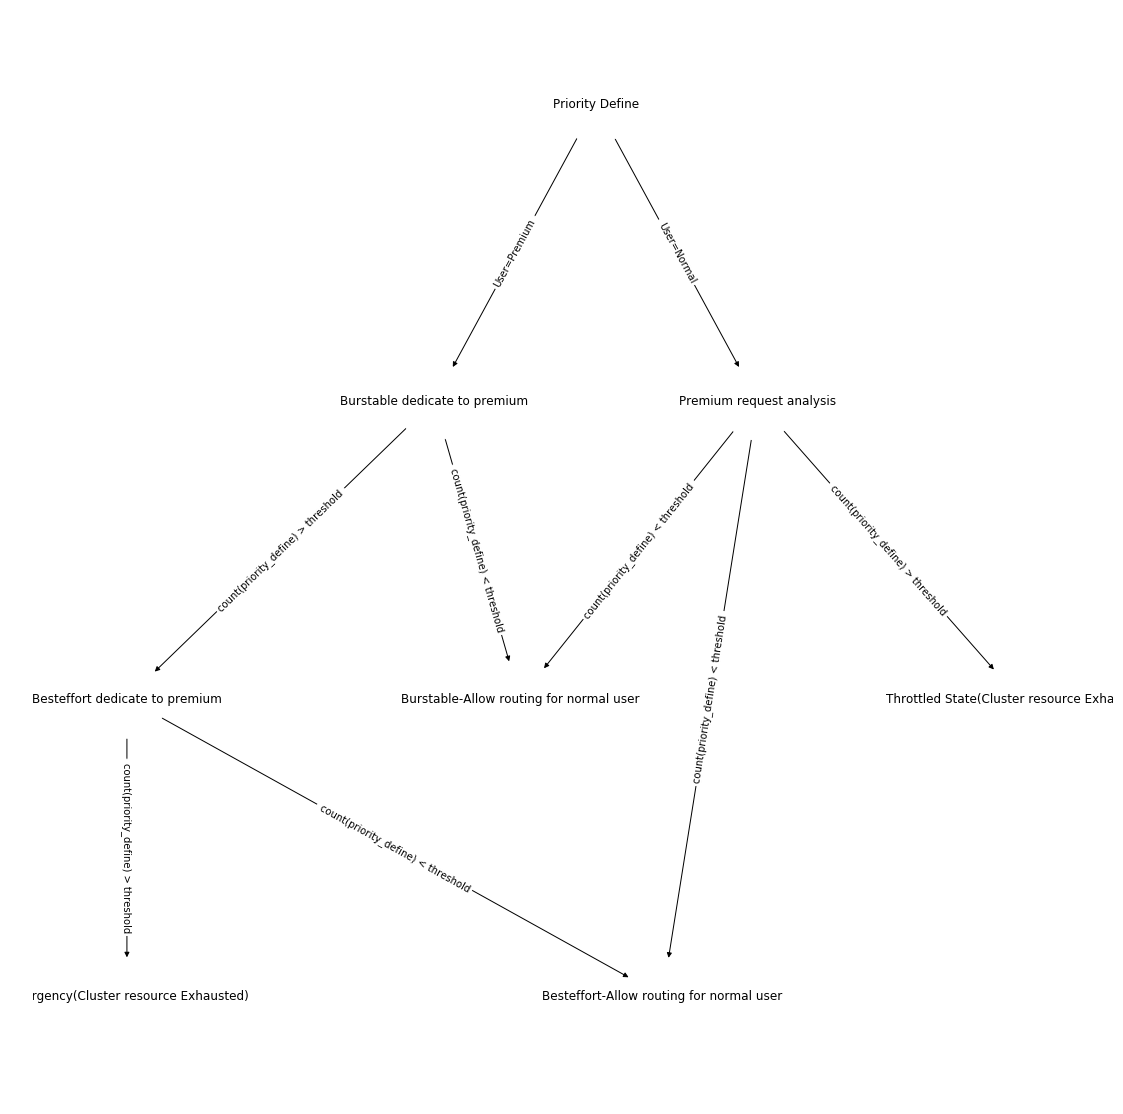

In [29]:
G=nx.DiGraph()
G.add_node("Priority Define")
G.add_weighted_edges_from([("Priority Define", "Burstable dedicate to premium", "User=Premium")])
G.add_weighted_edges_from([("Burstable dedicate to premium", "Besteffort dedicate to premium", "count(priority_define) > threshold")])
G.add_weighted_edges_from([("Burstable dedicate to premium", "Burstable-Allow routing for normal user", "count(priority_define) < threshold")])
G.add_weighted_edges_from([("Priority Define", "Premium request analysis","User=Normal")])
G.add_weighted_edges_from([("Premium request analysis", "Throttled State(Cluster resource Exhausted)", "count(priority_define) > threshold")])
G.add_weighted_edges_from([("Premium request analysis", "Burstable-Allow routing for normal user", "count(priority_define) < threshold")])
G.add_weighted_edges_from([("Premium request analysis", "Besteffort-Allow routing for normal user", "count(priority_define) < threshold")])
G.add_weighted_edges_from([("Besteffort dedicate to premium", "Besteffort-Allow routing for normal user", "count(priority_define) < threshold")])
G.add_weighted_edges_from([("Besteffort dedicate to premium", "Emergency(Cluster resource Exhausted)", "count(priority_define) > threshold")])

print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.figure(figsize=(15,15)) 
pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True, node_size=6000, node_color='w')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig("optimization_path_prioritydefine.pdf",layout='tight') # save as png
plt.show() # display

Nodes of graph: 
['Resource Limit', 'Perf. rate (r) calculation', 'Local search in round robin until timeout(population ranked by pod deployment timestamp)', 'Execute', 'r_estimated = r_estimated - delta']
Edges of graph: 
[('Resource Limit', 'Perf. rate (r) calculation'), ('Perf. rate (r) calculation', 'Local search in round robin until timeout(population ranked by pod deployment timestamp)'), ('Local search in round robin until timeout(population ranked by pod deployment timestamp)', 'Execute'), ('Local search in round robin until timeout(population ranked by pod deployment timestamp)', 'r_estimated = r_estimated - delta')]


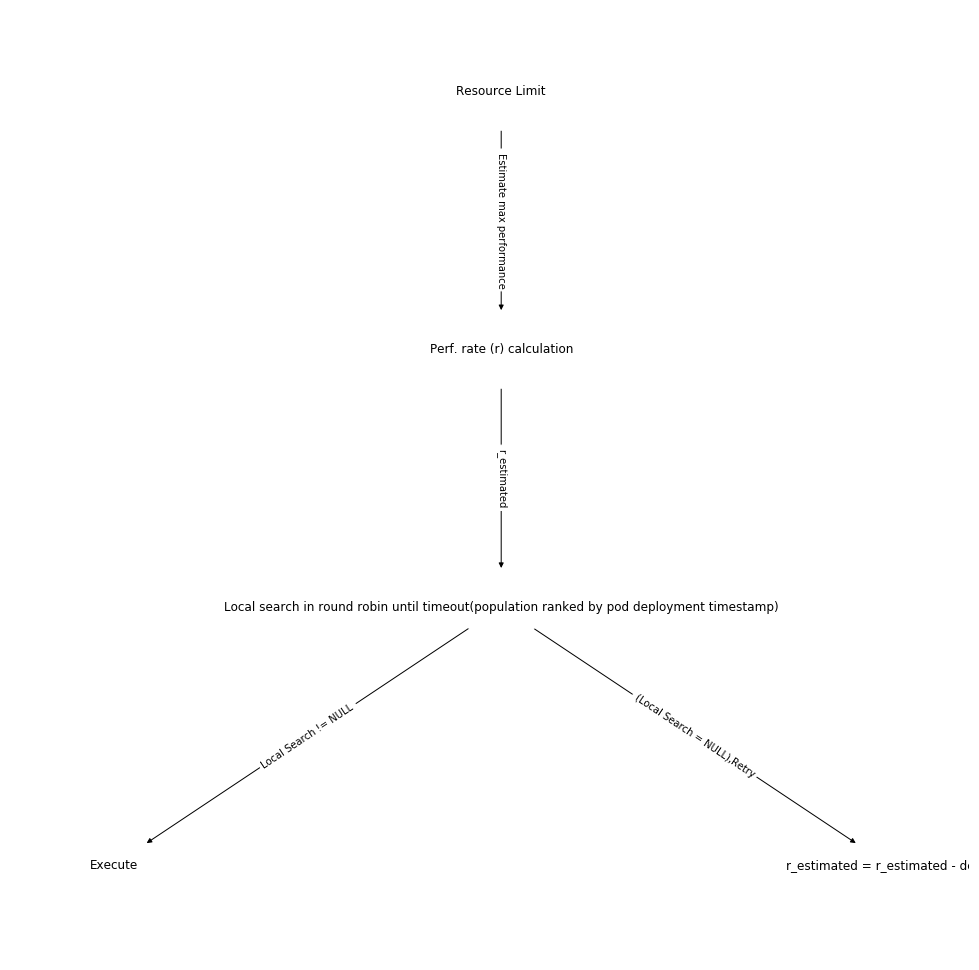

In [32]:
G=nx.DiGraph()
G.add_node("Resource Limit")
G.add_weighted_edges_from([("Resource Limit", "Perf. rate (r) calculation", "Estimate max performance")])
G.add_weighted_edges_from([("Perf. rate (r) calculation", "Local search in round robin until timeout(population ranked by pod deployment timestamp)", "r_estimated")])
G.add_weighted_edges_from([("Local search in round robin until timeout(population ranked by pod deployment timestamp)", "Execute","Local Search != NULL")])
G.add_weighted_edges_from([("Local search in round robin until timeout(population ranked by pod deployment timestamp)", "r_estimated = r_estimated - delta","(Local Search = NULL),Retry")])
#G.add_weighted_edges_from([("r_estimated = r_estimated - delta", "Local search in round robin until timeout(population ranked by pod deployment timestamp)", "(Local Search = NULL),Retry")])



print("Nodes of graph: ")
print(G.nodes())
print("Edges of graph: ")
print(G.edges())

write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.figure(figsize=(13,13)) 
pos =graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True, node_size=6000, node_color='w')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.savefig("optimization_path_resourcelimit.pdf",layout='tight') # save as png
plt.show() # display

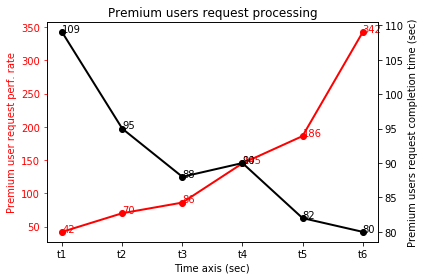

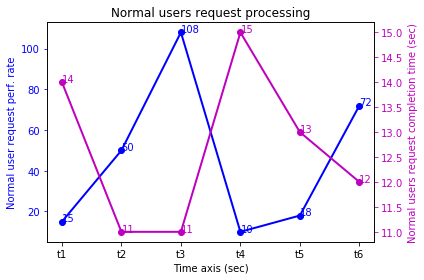

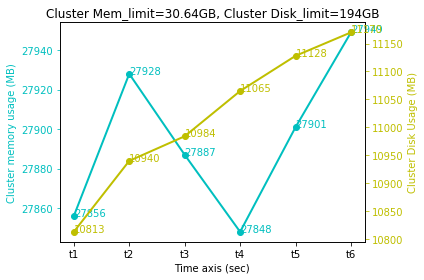

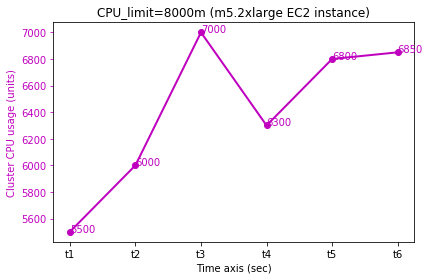

In [3]:
from matplotlib import pyplot as plt
Premium_users_req = [42, 70, 86, 145, 186, 342 ]
Normal_users_req = [15, 50, 108, 10, 18, 72]
Premmium_user_req_completion_time = [109, 95, 88, 90, 82, 80]
Normal_user_req_completion_time = [14, 11, 11, 15, 13, 12]
Mem = [27856, 27928, 27887, 27848, 27901, 27949]
Disk = [10813, 10940, 10984, 11065, 11128, 11170]
CPU = [5500, 6000, 7000, 6300, 6800, 6850]
x_axis = range(1,len(Premium_users_req)+1)

fig, ax1 = plt.subplots()
ax1.plot(x_axis,Premium_users_req,'ro-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Premium user request perf. rate', color='r')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='r')
for i,j in zip(x_axis,Premium_users_req):
    ax1.annotate(str(j),xy=(i,j), color='r')
ax2 = ax1.twinx()
ax2.plot(x_axis,Premmium_user_req_completion_time,'ko-', linewidth=2)
ax2.set_ylabel('Premium users request completion time (sec)', color='k')
ax2.tick_params(colors='k')
ax1.legend()
for i,j in zip(x_axis,Premmium_user_req_completion_time):
    ax2.annotate(str(j),xy=(i,j),color='k')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Premium users request processing')
plt.tight_layout()
plt.savefig('premium-user-req-healthy-case.pdf')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(x_axis,Normal_users_req,'bo-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Normal user request perf. rate',color='b')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='b')
for i,j in zip(x_axis,Normal_users_req):
    ax1.annotate(str(j),xy=(i,j), color='b')
ax2 = ax1.twinx()
ax2.plot(x_axis,Normal_user_req_completion_time,'mo-', linewidth=2)
ax2.set_ylabel('Normal users request completion time (sec)', color='m')
ax2.tick_params(colors='m')
ax1.legend()
for i,j in zip(x_axis,Normal_user_req_completion_time):
    ax2.annotate(str(j),xy=(i,j), color='m')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Normal users request processing')
plt.tight_layout()
plt.savefig('normal-user-req-healthy-case.pdf')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(x_axis,Mem,'co-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Cluster memory usage (MB)', color='c')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='c')
for i,j in zip(x_axis,Mem):
    ax1.annotate(str(j),xy=(i,j), color='c')
ax2 = ax1.twinx()
ax2.plot(x_axis,Disk,'yo-', linewidth=2)
ax2.set_ylabel('Cluster Disk Usage (MB)', color='y')
ax2.tick_params(colors='y')
ax1.legend()
for i,j in zip(x_axis,Disk):
    ax2.annotate(str(j),xy=(i,j), color='y')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Cluster Mem_limit=30.64GB, Cluster Disk_limit=194GB')
plt.tight_layout()
plt.savefig('cluster-resource-usage-healthy-case.pdf')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(x_axis,CPU,'mo-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Cluster CPU usage (units)', color='m')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='m')
for i,j in zip(x_axis,CPU):
    ax1.annotate(str(j),xy=(i,j), color='m')
plt.title('CPU_limit=8000m (m5.2xlarge EC2 instance)')
plt.tight_layout()
plt.savefig('cluster-resource-cpu-usage-healthy-case.pdf')
plt.show()

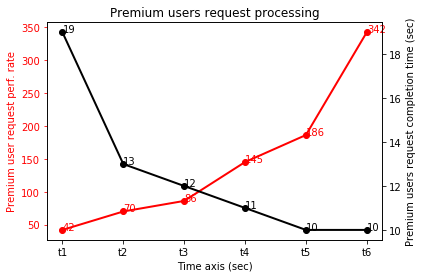

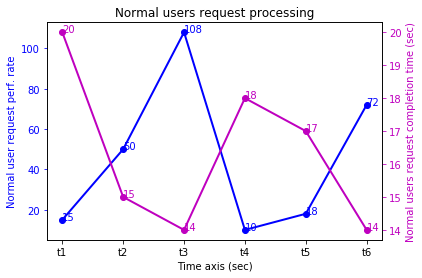

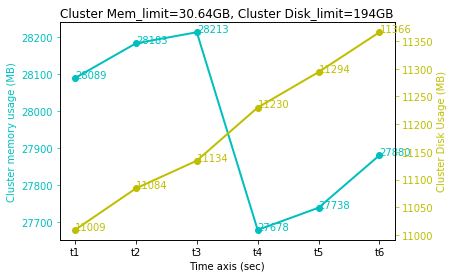

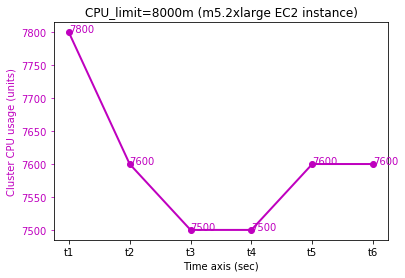

In [31]:
from matplotlib import pyplot as plt
Premium_users_req = [42, 70, 86, 145, 186, 342 ]
Normal_users_req = [15, 50, 108, 10, 18, 72]
Premmium_user_req_completion_time = [19, 13, 12, 11, 10, 10]
Normal_user_req_completion_time = [20, 15, 14, 18, 17, 14]
Mem = [28089, 28183, 28213, 27678, 27738, 27880]
Disk = [11009, 11084, 11134, 11230, 11294, 11366]
CPU = [7800, 7600, 7500, 7500, 7600, 7600]
x_axis = range(1,len(Premium_users_req)+1)

fig, ax1 = plt.subplots()
ax1.plot(x_axis,Premium_users_req,'ro-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Premium user request perf. rate', color='r')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='r')
for i,j in zip(x_axis,Premium_users_req):
    ax1.annotate(str(j),xy=(i,j), color='r')
ax2 = ax1.twinx()
ax2.plot(x_axis,Premmium_user_req_completion_time,'ko-', linewidth=2)
ax2.set_ylabel('Premium users request completion time (sec)', color='k')
ax2.tick_params(colors='k')
ax1.legend()
for i,j in zip(x_axis,Premmium_user_req_completion_time):
    ax2.annotate(str(j),xy=(i,j),color='k')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Premium users request processing')
plt.savefig('premium-user-intelligent_orchestration-case.pdf')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(x_axis,Normal_users_req,'bo-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Normal user request perf. rate',color='b')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='b')
for i,j in zip(x_axis,Normal_users_req):
    ax1.annotate(str(j),xy=(i,j), color='b')
ax2 = ax1.twinx()
ax2.plot(x_axis,Normal_user_req_completion_time,'mo-', linewidth=2)
ax2.set_ylabel('Normal users request completion time (sec)', color='m')
ax2.tick_params(colors='m')
ax1.legend()
for i,j in zip(x_axis,Normal_user_req_completion_time):
    ax2.annotate(str(j),xy=(i,j), color='m')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Normal users request processing')
plt.savefig('normal-user-req-intelligent_orchestration-case.pdf')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(x_axis,Mem,'co-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Cluster memory usage (MB)', color='c')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='c')
for i,j in zip(x_axis,Mem):
    ax1.annotate(str(j),xy=(i,j), color='c')
ax2 = ax1.twinx()
ax2.plot(x_axis,Disk,'yo-', linewidth=2)
ax2.set_ylabel('Cluster Disk Usage (MB)', color='y')
ax2.tick_params(colors='y')
ax1.legend()
for i,j in zip(x_axis,Disk):
    ax2.annotate(str(j),xy=(i,j), color='y')
#plt.savefig('Thread-optime-multipleusers.pdf')
plt.title('Cluster Mem_limit=30.64GB, Cluster Disk_limit=194GB')
plt.savefig('cluster-resource-usage-intelligent_orchestration-case.pdf')
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(x_axis,CPU,'mo-', linewidth=2)
ax1.set_xlabel('Time axis (sec)')
ax1.set_ylabel('Cluster CPU usage (units)', color='m')
plt.xticks(x_axis, ['t1', 't2', 't3', 't4', 't5', 't6'])
ax1.tick_params(axis='y', colors='m')
for i,j in zip(x_axis,CPU):
    ax1.annotate(str(j),xy=(i,j), color='m')
plt.title('CPU_limit=8000m (m5.2xlarge EC2 instance)')
plt.savefig('cluster-resource-cpu-usage-intelligent_orchestration-case.pdf')
plt.show()

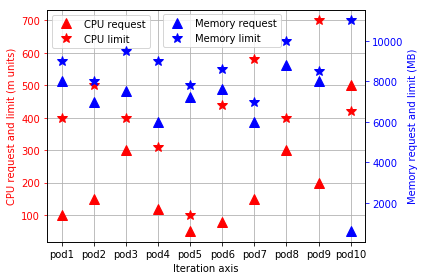

In [79]:
from matplotlib import pyplot as plt
CPU_req=[100,150,300,120,50,80,150,300,200,500]
CPU_lim=[400,500,400,310,100,440,580,400,700,420]
Mem_req=[8000,7000,7500,6000,7200,7600,6000, 8800,8000,600]
Mem_lim=[9000,8000,9500,9000,7800,8600,7000,10000,8500,11000]
LS_T_completion = [83, 95, 200, 63, 76, 52]
FS_T_completion = [83, 95, 200, 63, 76, 52, 76, 44, 20, 45]
x_axis = range(1,len(CPU_req)+1)

fig, ax1 = plt.subplots()
ax1.plot(x_axis,CPU_req,'r^', ms=10, label='CPU request')
ax1.plot(x_axis,CPU_lim,'r*', ms=10, label='CPU limit')
plt.grid(True)
ax1.set_xlabel('Iteration axis')
ax1.set_ylabel('CPU request and limit (m units)', color='r')
plt.xticks(x_axis, ['pod1', 'pod2', 'pod3', 'pod4', 'pod5', 'pod6', 'pod7', 'pod8', 'pod9', 'pod10'])
ax1.tick_params(axis='y', colors='r')
#for i,j in zip(x_axis,CPU_req):
#    ax1.annotate(str(j),xy=(i,j), color='r')
#for i,j in zip(x_axis,CPU_lim):
#    ax1.annotate(str(j),xy=(i,j), color='r')
ax2 = ax1.twinx()
ax2.plot(x_axis,Mem_req,'b^', ms=10, label='Memory request')
ax2.plot(x_axis,Mem_lim,'b*', ms=10, label='Memory limit')
ax2.set_ylabel('Memory request and limit (MB)', color='b')
ax2.tick_params(colors='b')
#for i,j in zip(x_axis,Mem_req):
#    ax2.annotate(str(j),xy=(i,j),color='b')
#for i,j in zip(x_axis,Mem_lim):
#    ax2.annotate(str(j),xy=(i,j),color='b')
#plt.savefig('Thread-optime-multipleusers.pdf')

ax1.legend(loc='upper left')
ax2.legend(loc='center left', bbox_to_anchor=(0.35, 0.91))


#plt.title('Local Search on busrtable pods')
plt.tight_layout()
plt.savefig('localsearch-burstable.pdf')
plt.show()

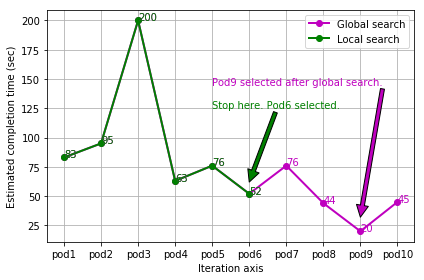

In [74]:
fig, ax1 = plt.subplots()
ax1.plot(x_axis,FS_T_completion,'mo-', linewidth=2, label='Global search')
ax1.plot(x_axis[:6],LS_T_completion,'go-', linewidth=2, label='Local search')
plt.grid(True)
ax1.set_xlabel('Iteration axis')
ax1.set_ylabel('Estimated completion time (sec)', color='k')
plt.xticks(x_axis, ['pod1', 'pod2', 'pod3', 'pod4', 'pod5', 'pod6', 'pod7', 'pod8', 'pod9', 'pod10'])
ax1.tick_params(axis='y', colors='k')

for i,j in zip(x_axis,FS_T_completion):
    ax1.annotate(str(j),xy=(i,j), color='m')
for i,j in zip(x_axis,LS_T_completion):
    ax1.annotate(str(j),xy=(i,j), color='g') 
ax1.annotate('Stop here. Pod6 selected.', xy=(6, 62), color='g',xytext=(5, 125),arrowprops=dict(facecolor='g'))

ax1.annotate('Pod9 selected after global search.', xy=(9, 32), color='m',xytext=(5, 145),arrowprops=dict(facecolor='m'))

    
ax1.legend(loc='upper right')
#plt.title('Estimate completion time')
plt.tight_layout()
plt.savefig('Completiontime-localsearch-burstable.pdf',layout='tight')
plt.show()